In [99]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

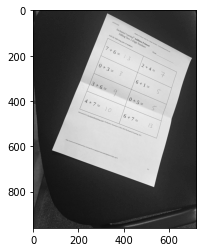

In [100]:
img = cv2.imread('img/scan.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

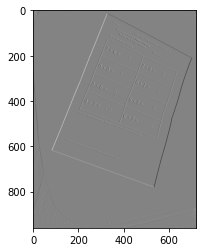

In [101]:
img_sobel_x = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
plt.imshow(img_sobel_x, cmap='gray')

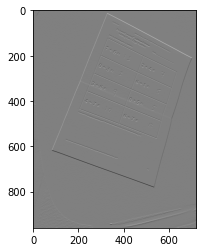

In [102]:
img_sobel_y = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
plt.imshow(img_sobel_y, cmap='gray')

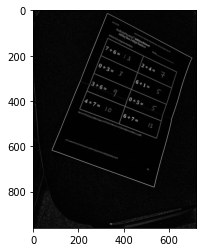

In [103]:
img_sobel = cv2.magnitude(x=img_sobel_x, y=img_sobel_y)
plt.imshow(img_sobel, cmap='gray')

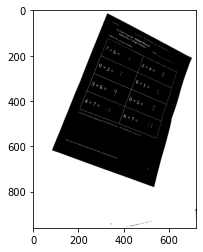

In [104]:
_, img = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)

plt.imshow(img, cmap='gray')

In [105]:
img.shape

(960, 720)

In [106]:
img = cv2.dilate(img, kernel=np.ones((3,3)), iterations = 1)

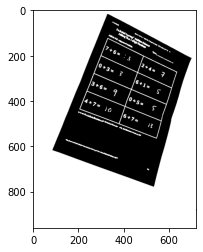

In [107]:
plt.imshow(img, cmap='gray')

In [108]:
img.shape

(960, 720)

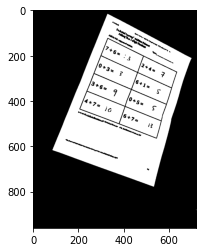

In [109]:
_, img = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)

plt.imshow(img, cmap='gray')

In [110]:
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [111]:
len(contours)

3

In [112]:
contours

[array([[[719, 889]],
 
        [[719, 890]]], dtype=int32),
 array([[[719, 876]],
 
        [[719, 877]],
 
        [[718, 878]],
 
        [[716, 878]],
 
        [[716, 879]],
 
        [[717, 880]],
 
        [[717, 881]],
 
        [[719, 881]]], dtype=int32),
 array([[[327,  17]],
 
        [[326,  18]],
 
        [[326,  19]],
 
        ...,
 
        [[330,  18]],
 
        [[329,  18]],
 
        [[328,  17]]], dtype=int32)]

In [113]:
cv2.drawContours(img.copy(), contours, contourIdx=0, color=127, thickness=3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [114]:
img_contorno = cv2.drawContours(img.copy(), contours, contourIdx=0, color=127, thickness=3)

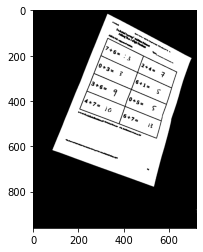

In [115]:
plt.imshow(img_contorno, cmap='gray')

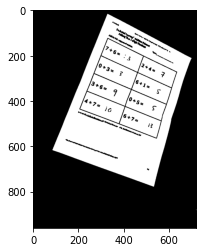

In [116]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

plt.imshow(img)

In [117]:
img.shape

(960, 720, 3)

In [118]:
img_contorno = cv2.drawContours(img.copy(), contours, contourIdx=2, color=(255, 165, 0), thickness=3)

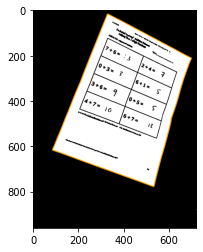

In [119]:
plt.imshow(img_contorno)

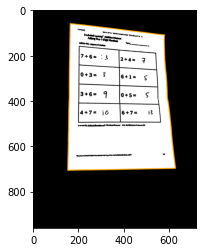

In [120]:
(h, w) = img_contorno.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 21, 1.0)
rotated = cv2.warpAffine(img_contorno, M, (w, h))
plt.imshow(rotated)

In [126]:
# Load an image
img = cv2.imread('img/scan.jpg')
# Rotação da imagem de 21 graus
(h, w) = clone.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 21, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
# Clone original image to not overlap drawings
clone = rotated.copy()

# Convert to gray
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray, thresh=127, maxval=255,type=cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)

# Find contours
#contours, _= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edge_detected_image, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_NONE)

contour_list = []
for contour in contours:
    # # approximte for circles
    # approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    # area = cv2.contourArea(contour)
    # if ((len(approx) > 8) & (area > 30) ):
    #     contour_list.append(contour)
    area = cv2.contourArea(contour)
    if ( area > 270000 ):
        print(area)
        contour_list.append(contour)


# Draw contours on the original image
cv2.drawContours(clone, contour_list,  -1, (255,0,0), 2)


# there is an outer boundary and inner boundary for each eadge, so contours double
print('Number of found circles: {}'.format(int(len(contour_list)/2)))


#plt.imshow(rotated)
#Displaying the results 




273565.0
273562.0
Number of found circles: 1


In [122]:
cnt = contour_list[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
x,y,w,h = cv2.boundingRect(cnt)

In [123]:

crop_img = rotated[y:y+h, x:x+w]


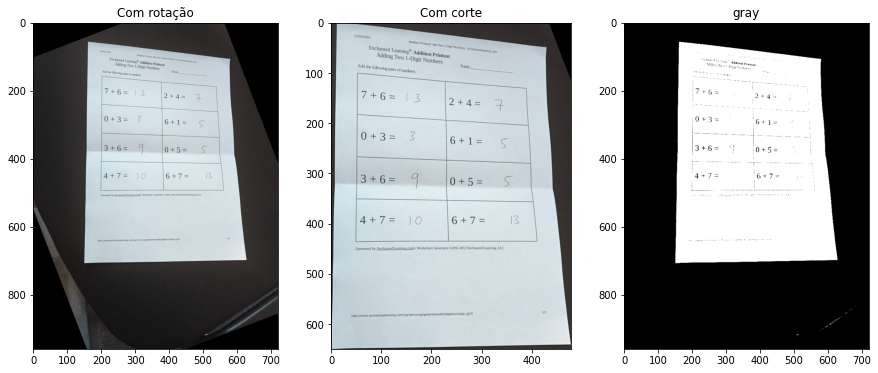

In [124]:
plt.figure(figsize=(15,6))   
plt.subplot(131) 
plt.title('Com rotação')
plt.imshow(rotated)
plt.subplot(132) 
plt.title('Com corte')
plt.imshow(crop_img)
plt.subplot(133) 
plt.title('gray')
plt.imshow(gray_threshed, cmap='gray')

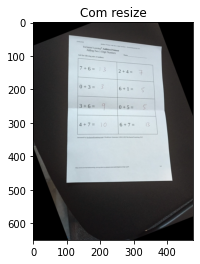

In [125]:

# resize image
resized = cv2.resize(rotated, (w,h), interpolation = cv2.INTER_AREA)
plt.title('Com resize')
plt.imshow(resized)